# The Neighborhoods in LA #

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#Data)
* [Methodology](#Methodology)
* [Results](#Results)
* [Discussion](#Discussion)
* [Conclusion](#Conclusion)

# Introduction/Business Problem #

This project aims to help people like myself who wish to reside in **Los Angeles (County)，California** in the future but do not know which neighborhood to choose. Los Angeles is a very versatile region, with the downtown being populated and 
commercialized and the surrounding regions being chill and sparsely populated. For example, I personally enjoy living in a tranquil environment, so I would choose to live around the edges of LA. It helps people make decisions based on their personal interest. 

This includes the choice of conveniency (the distance to shops and restaurants nearby), the number of schools around and their ratings, the crime rate, the budget on housing and living expenses, etc. There are a lot to explore before one makes such an important decision.

This project will serve as a guidence for people to **find the neighborhoods of their best fit.** This project will be done with the use of k-clustering.

Problem
To find answer to the following questions:
1. Which area is most crowded with the most venues nearby?
2. What crime happens most frequently in that area?

# Data #

Based on definition of our problem, factors that will influence our decission are:

- number of existing restaurants or stores, etc. in the neighborhood
- distance of neighborhood from city center
- crime rate in the neighborhood

Following data sources will be needed to extract/generate the required information:

1. Crime in Los Angeles
Link: https://www.kaggle.com/cityofLA/crime-in-los-angeles
We will observe the crime rate in each area.

2. Zip Code of Neighbourhoods in LA
Link: http://www.laalmanac.com/communications/cm02_communities.php
Extract the zip code of each area from this data set

3. ArcGIS API
Using the extracted zip code from the previous data set, we will utilize ArcGIS API to get the latitude and longitude and create a map visualization (using folium).

4. Foursquare API
We will then be using the Foursquare location data to access the data for millions of places and their place API with the use of unsupervised k-means clustering algorithm to solve for the problem. Due to http request limitations the number of places per neighborhood parameter would reasonably be set to 100 and the radius parameter would be set to 500.

The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of the postcodes. The information obtained per venue as follows:

Neighbourhood : Name of the Neighbourhood

Neighbourhood Latitude : Latitude of the Neighbourhood

Neighbourhood Longitude : Longitude of the Neighbourhood

Venue : Name of the Venue

Venue Latitude : Latitude of Venue

Venue Longitude : Longitude of Venue

Venue Category : Category of Venue


# Methodology #

The methodology can be grouped by three parts:

1. Data Importing and Data Cleaning (for all 4 data sources listed in the data section)

2. Model Building

3. Cluster Examination

First thing of all, import all the packages that we will need for this project.

In [62]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

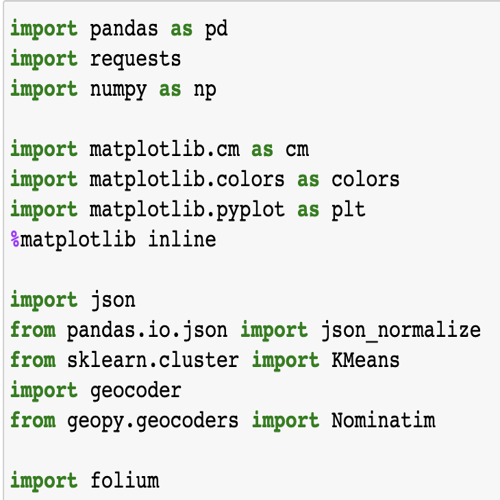

In [45]:
from PIL import Image
image = Image.open("1.png")
new_image = image.resize((500, 500))
new_image

Pandas : To collect and manipulate data in JSON and HTMl and then data analysis
requests : Send HTTP requests
numpy: Computations

matplotlib : Detailing the generated maps

json: To store and exchange data
sklearn : To import Kmeans (machine learning model)
geocoder: To encode geographic data

folium : To generate maps of Los Angeles

## 1. Data Importing and Data Cleaning ##

## 1.1 Crime Data ##
Before getting into the analysis and modeling, we begin by first observing the crime rate in each area of Los Angeles. I have downloaded the data set, so we only need to read the csv file.

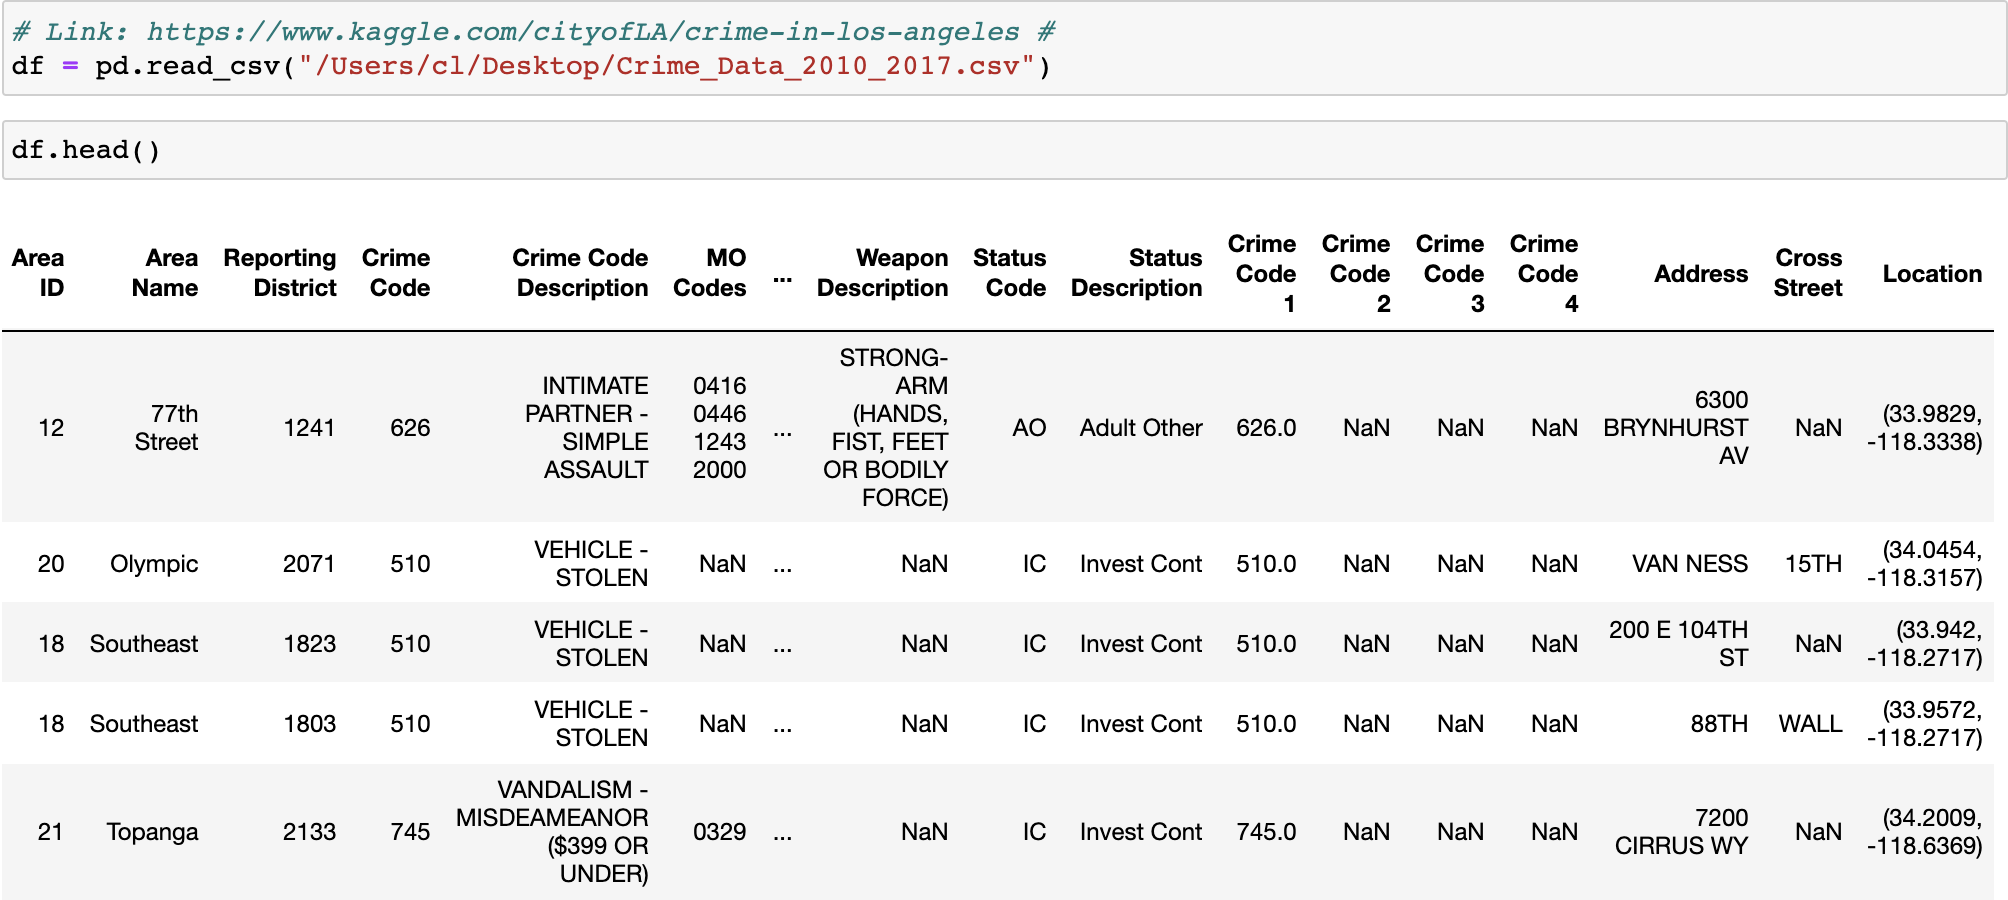

In [41]:
Image.open("2.png")

Clean the data:
1. drop the NaN's.
2. make sure the dates are in datetime in python.
3. extract incidents occuring between 06/01/2017 and 12/31/2017.
4. extract columns that include informations we want ("Date Occurred","Area ID","Area Name","Crime Code Description","Address","Location ")
5. split the location into columns of longitude and latitude

and we get the table below.

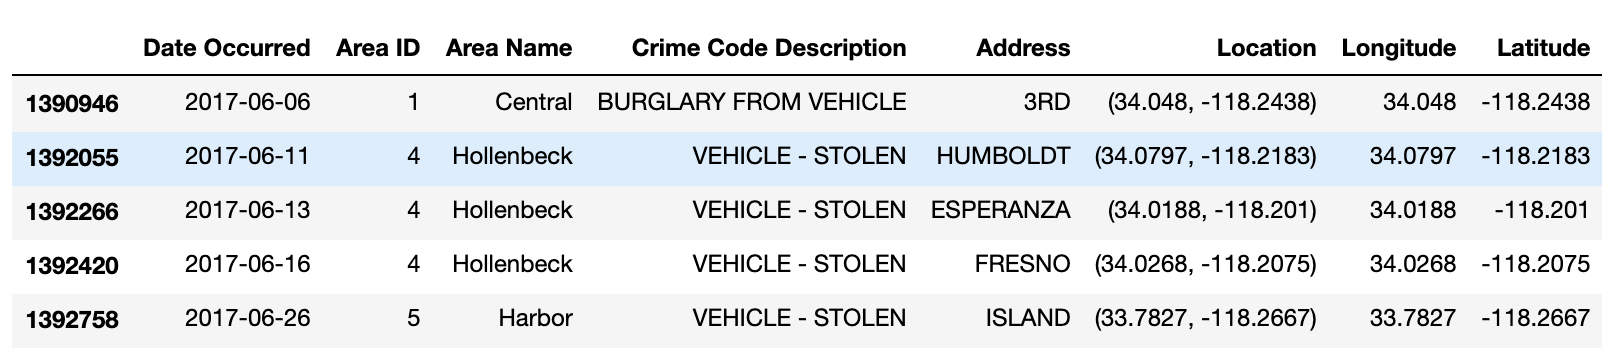

In [20]:
Image.open("3.png")

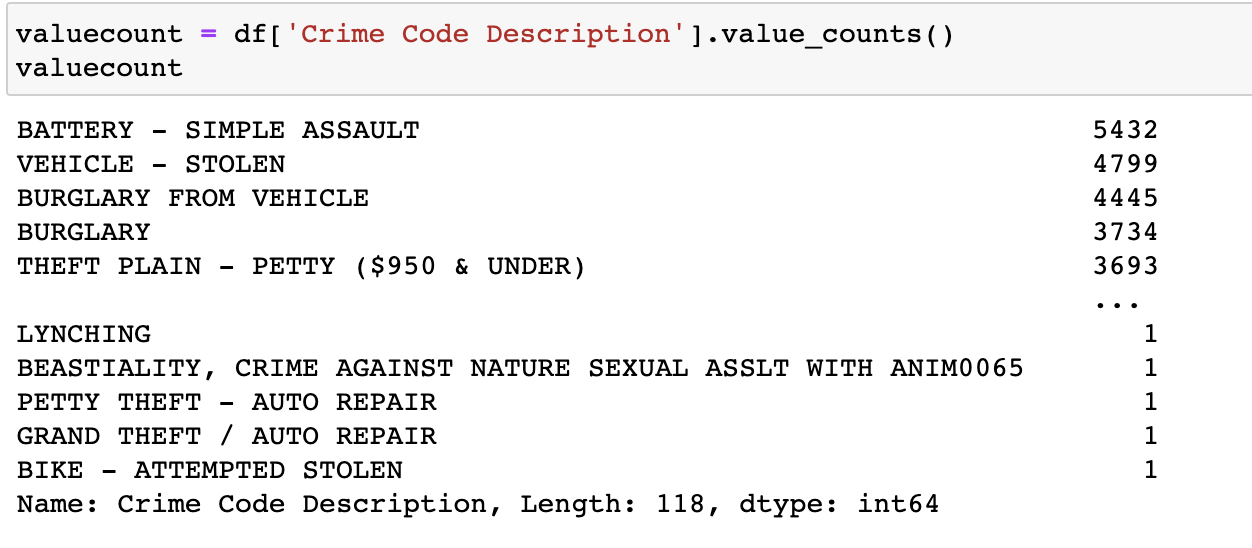

In [21]:
Image.open("4.png")

From this table we can tell which the most frequently occuring crimes are.

## 1.2 Zip Code of Neighbourhoods in LA ##

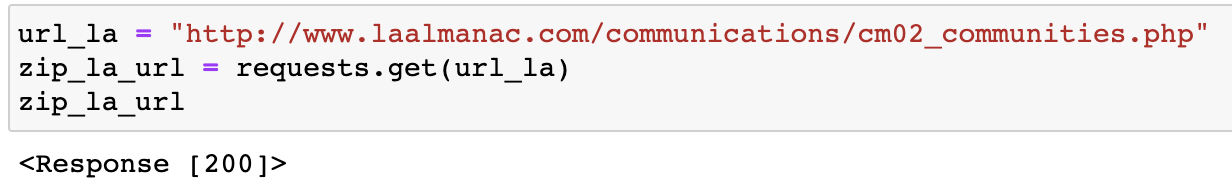

In [22]:
Image.open("5.png")


Data Cleaning:

1. Rename the columns.
2. Replace empty space '' with '_'
3. Remove rows such that the columns of City/Community contain the partial string '(PO Boxes)'.


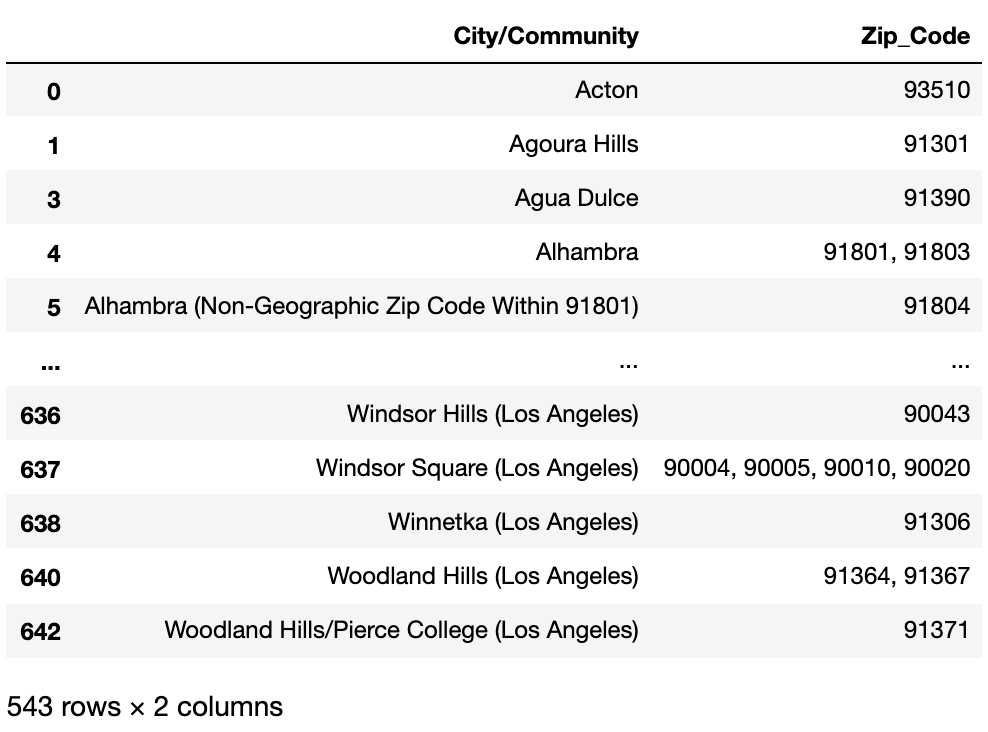

In [24]:
Image.open("6.png")

Here we have extracted the zip codes for each city/community in LA, and they are ready to be used for ArcGIS API.

## 1.3 ArcGIS API: Latitude and Longitude##

Data Processing:

1. Import Libraries for ArcGIS API.
2. Define a function that outputs the latitude and longitude from a zip code.
3. Run the function over all zip code from the previous data set.
4. Split the columns into columns of longitude and latitude.
5. Merge them into the previous data set and we get the table below.

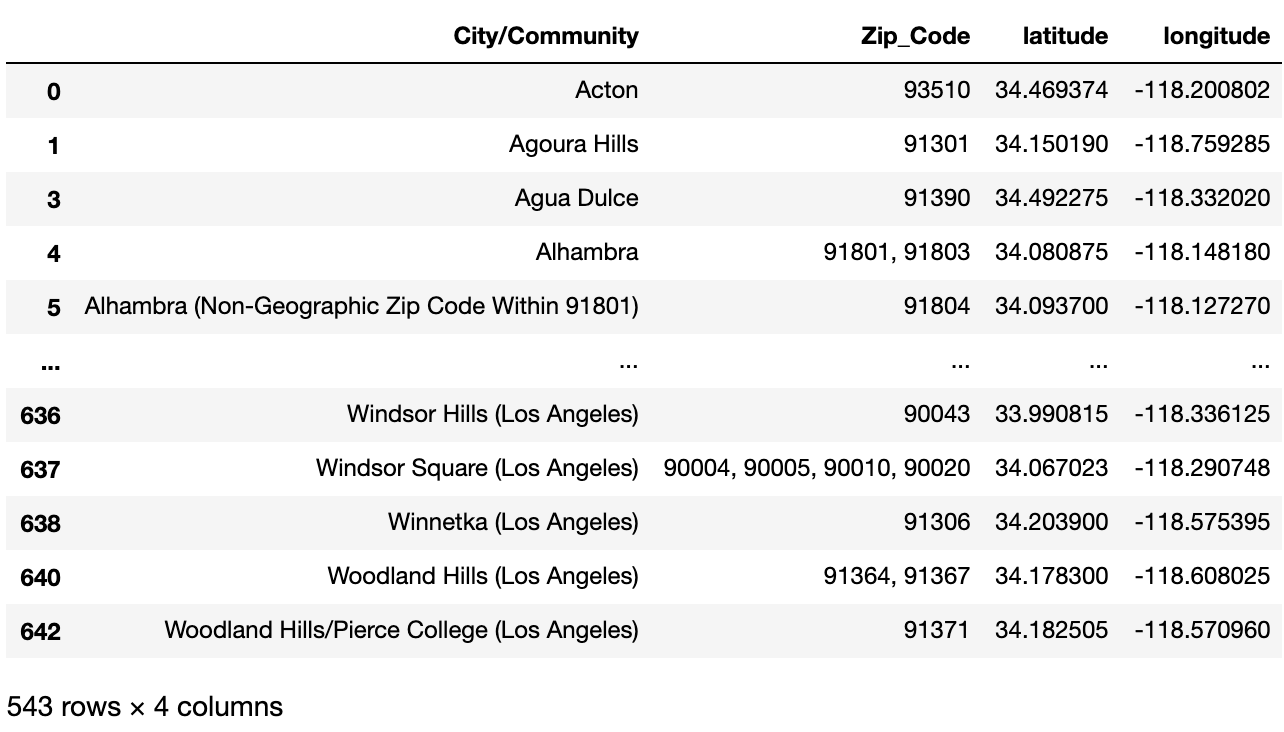

In [25]:
Image.open("7.png")

Visualize the Map of Los Angeles, CA using the data above will be in the visualization section.

## 1.4 Foursqure API: Venues in LA ##

## 1.4.1 Get Nearby Venues ##

1. Define Foursquare Credentials and Version
2. Define a function named 'getNearbyVenues'.

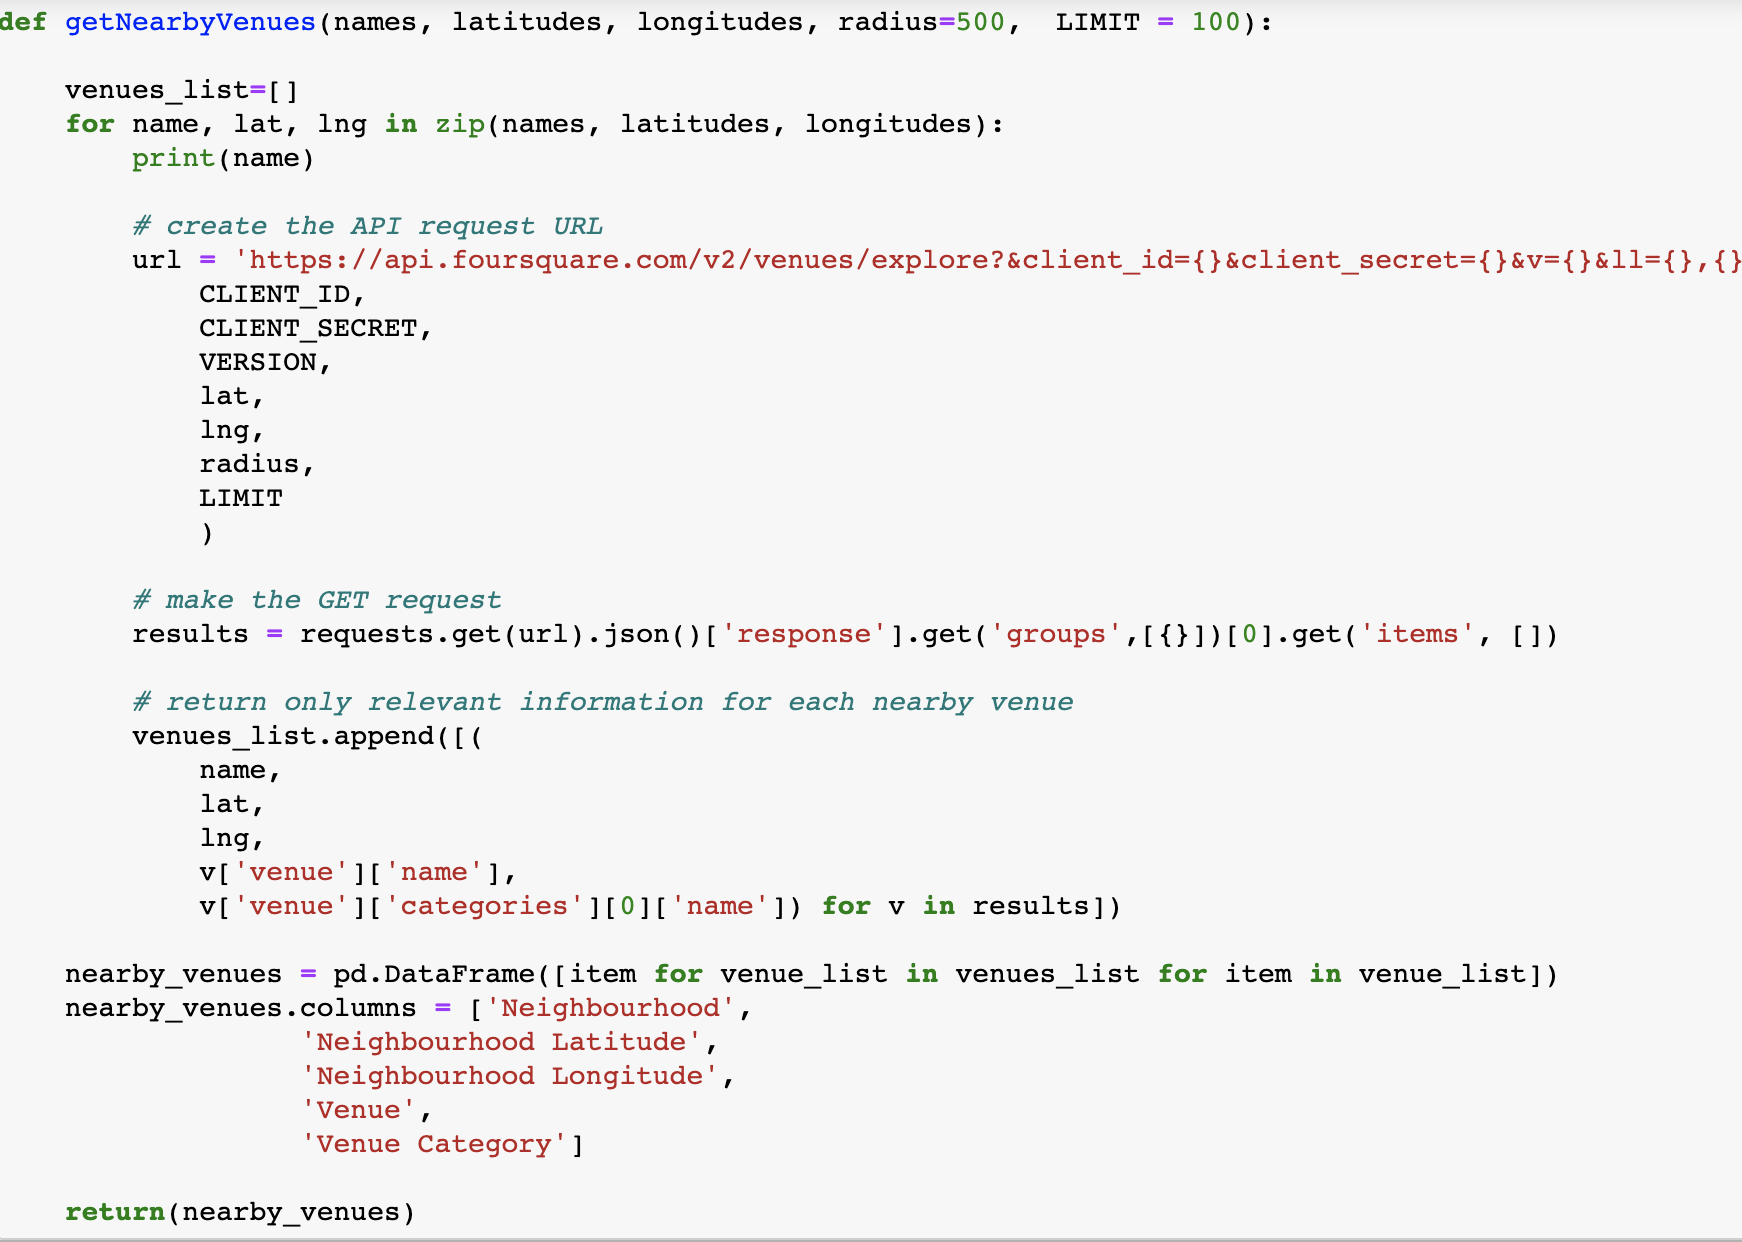

In [29]:
Image.open("10.png")

Using the function, we can find venues near the latitude and longitude we got from ArcGIS API. 

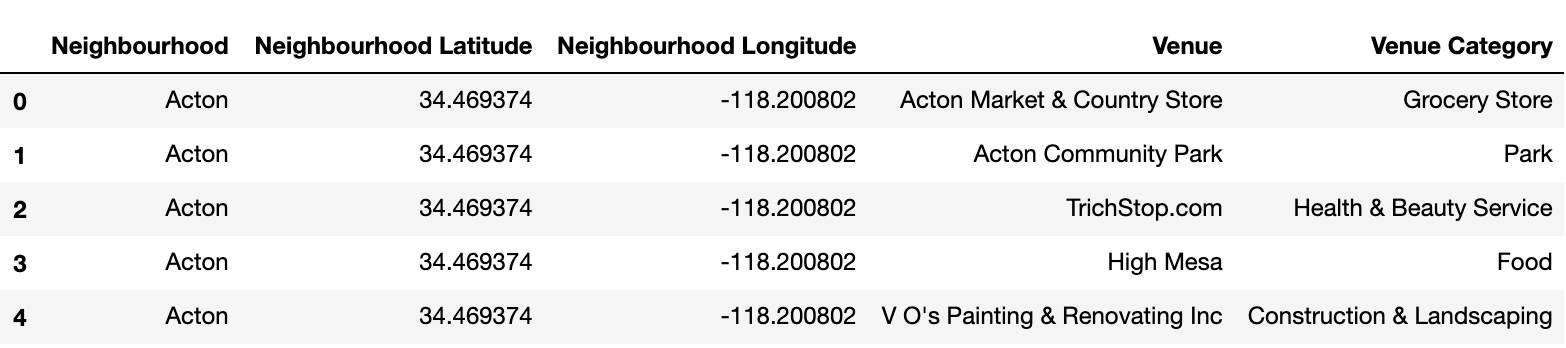

In [28]:
Image.open("9.png")

## 1.4.2 Group by Venue Categories ##

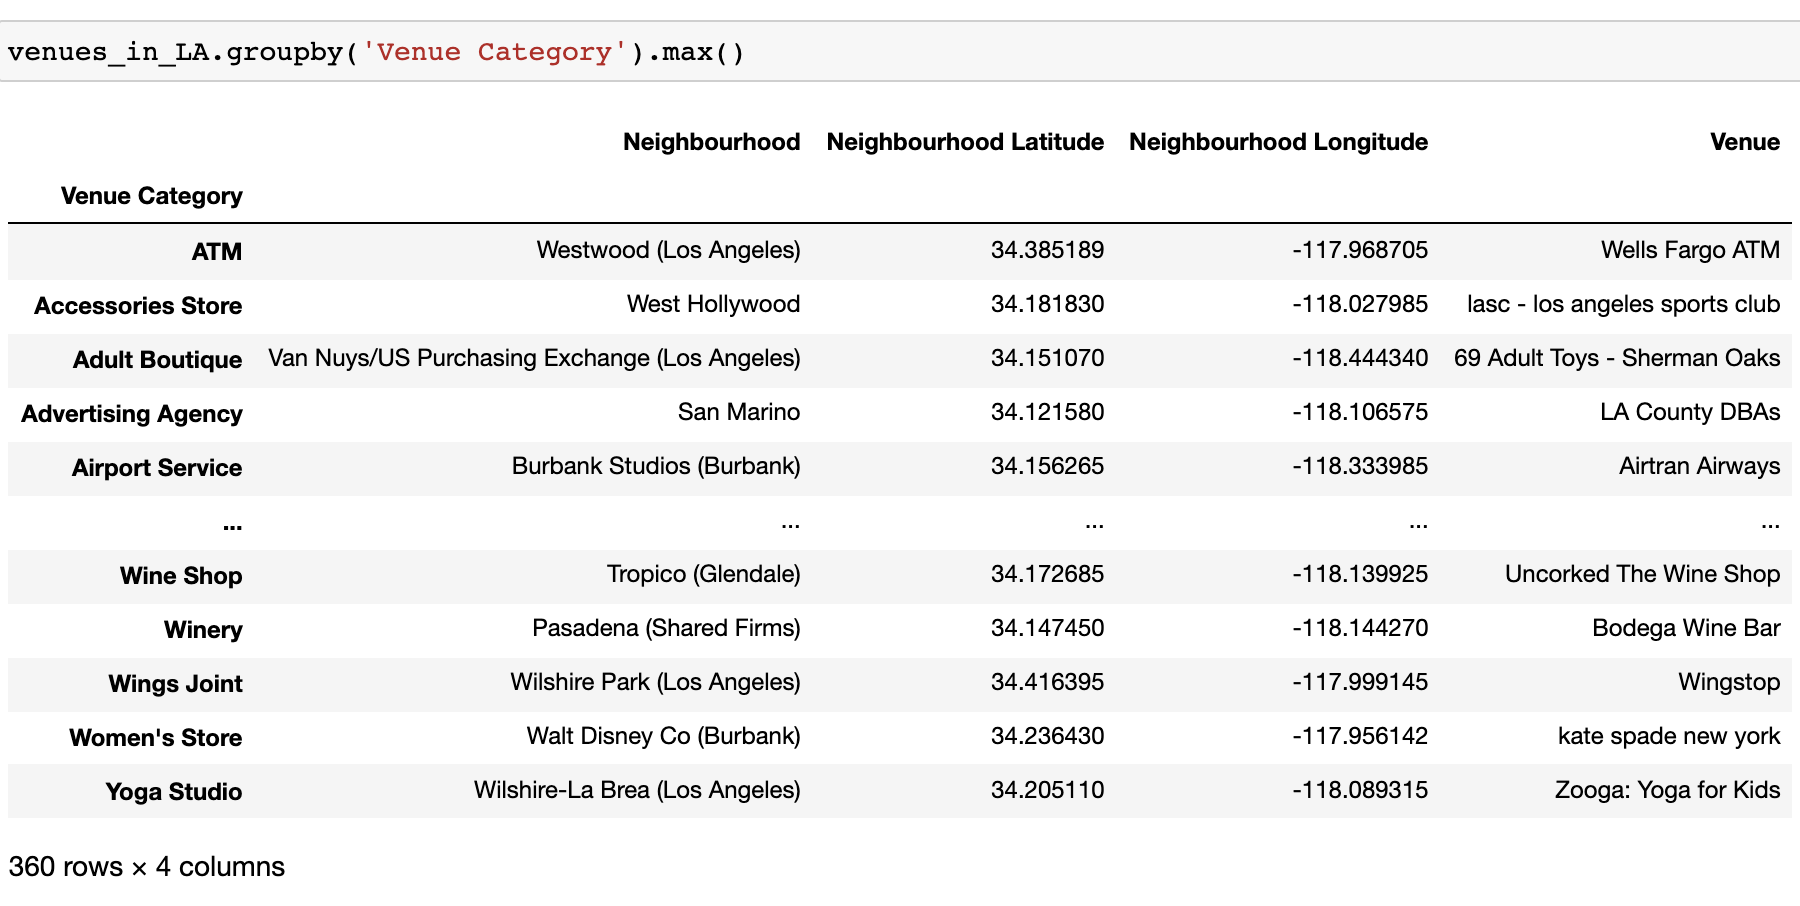

In [31]:
Image.open("11.png")

## 1.4.3 One Hot Encoding ##

We use the One Hot Encoding to work with our categorical datatype of the venue categories. This helps to convert the categorical data into numeric data.

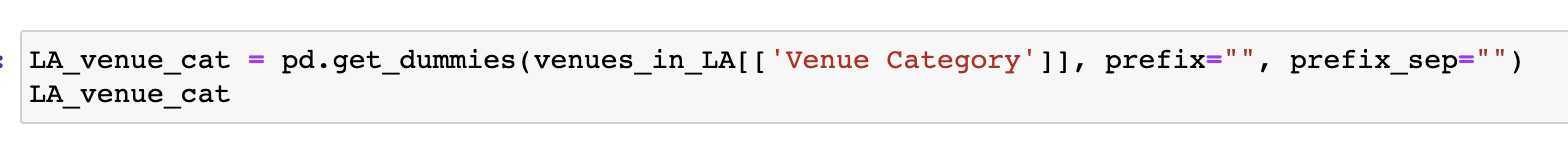

In [32]:
Image.open("12.png")

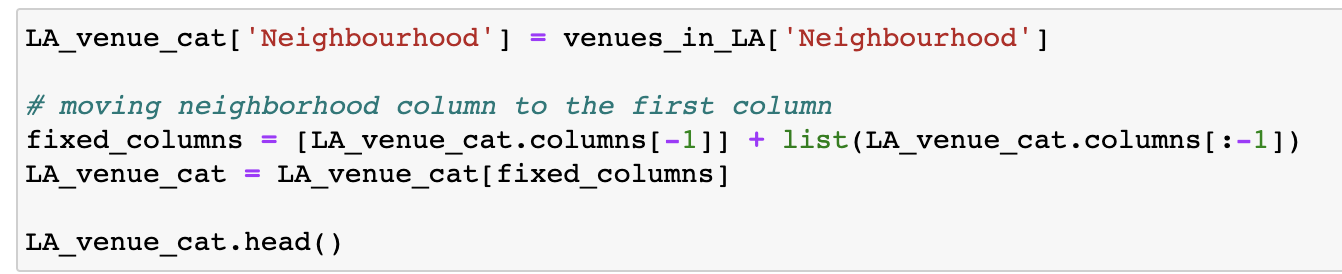

In [33]:
Image.open("13.png")

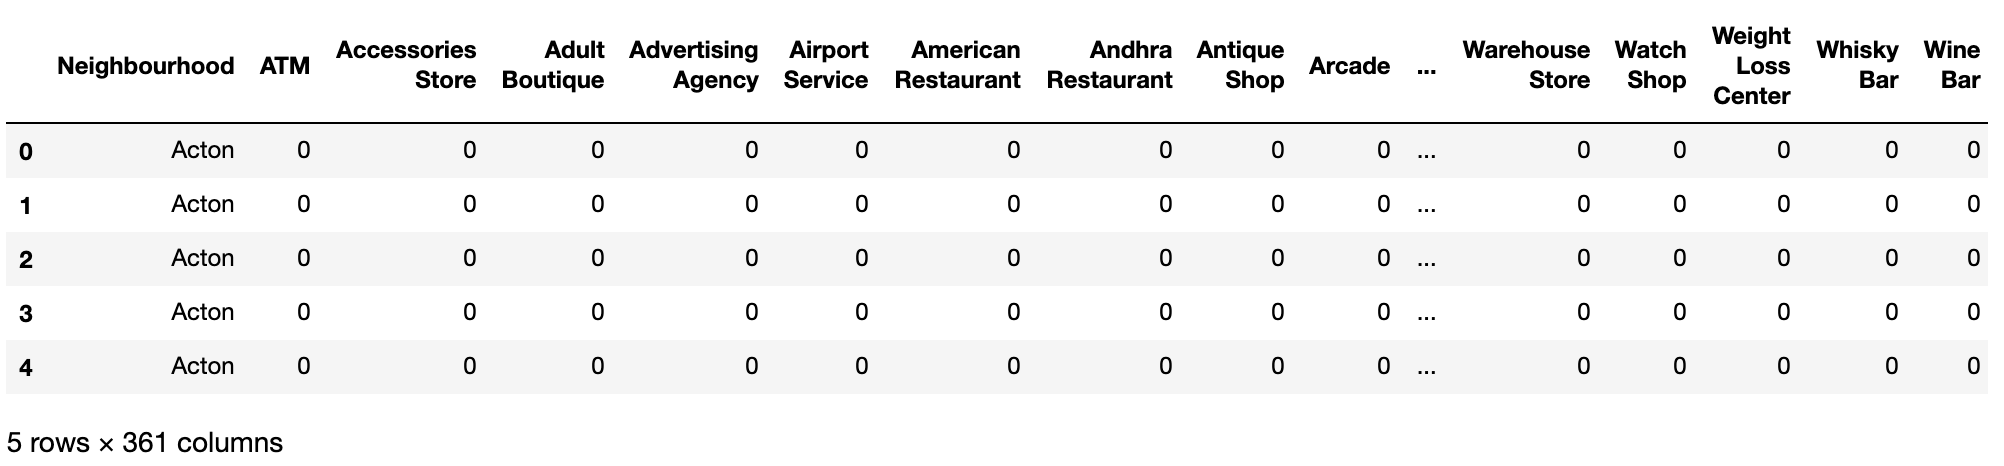

In [34]:
Image.open("14.png")

## 1.4.4 Most Common Venues ##

Define a function named 'return_most_common_venues'.

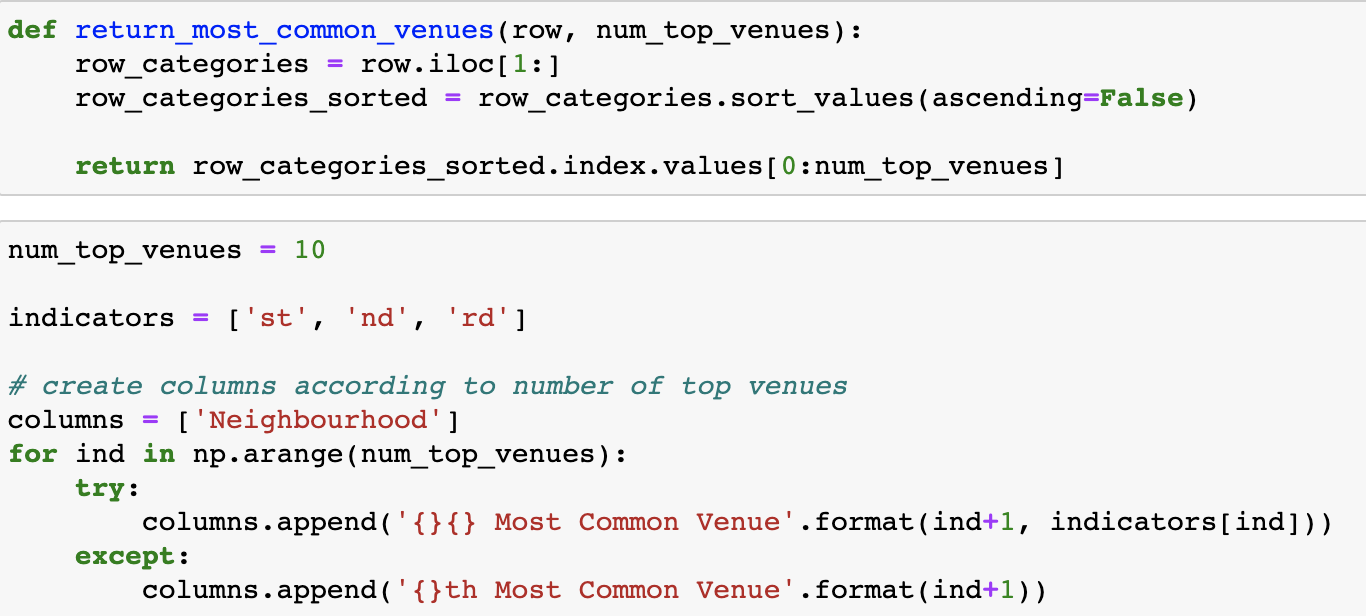

In [37]:
Image.open("15.png")

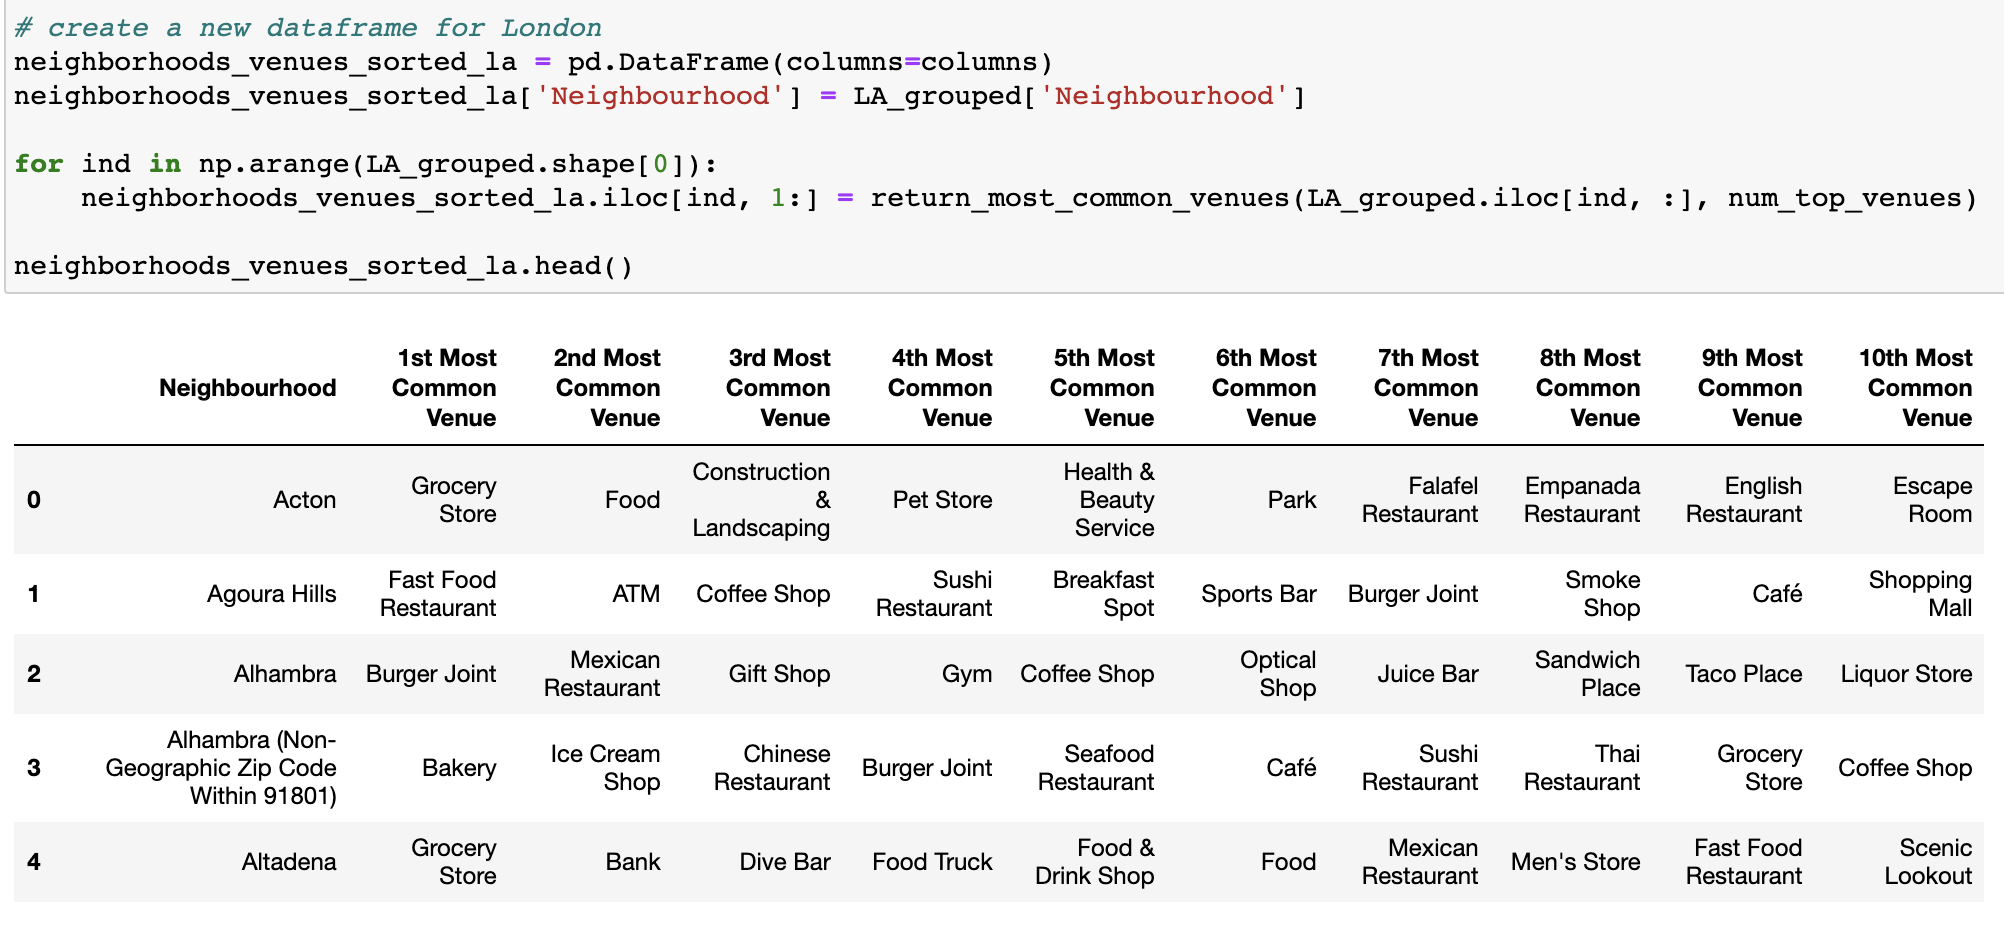

In [36]:
Image.open("16.png")

## 2. Model Building ##

1. Cluster the city of LA to 5.
2. Run k-means clustering.
3. Label Clustered Data.
4. Join the table to la_merged on 'City/Community'/
5. Drop the NaN's.

Then we get a table that looks like this.

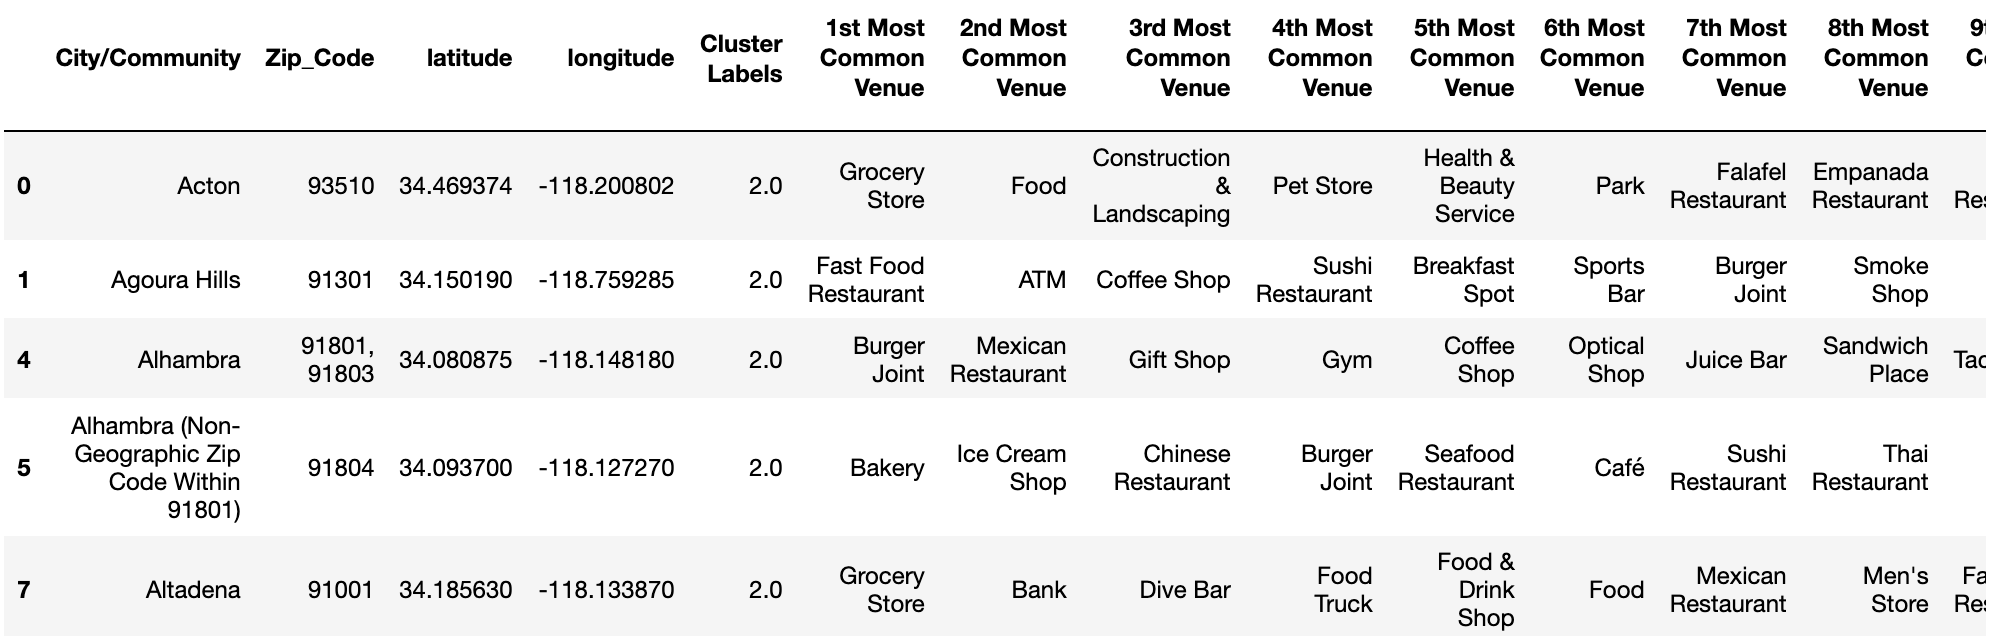

In [46]:
Image.open("17.png")

## 3. Cluster Exmination ##

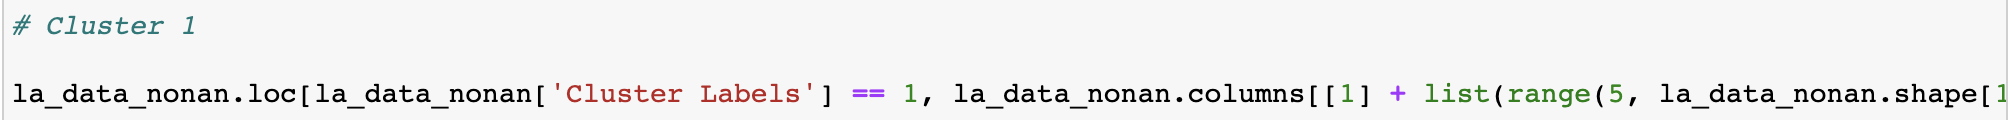

In [52]:
Image.open("21.png")

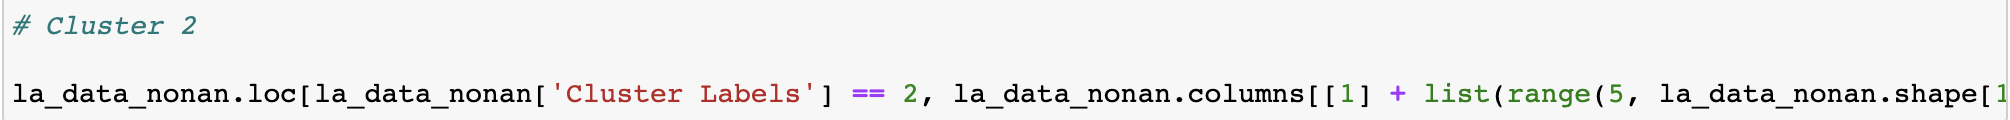

In [53]:
Image.open("22.png")

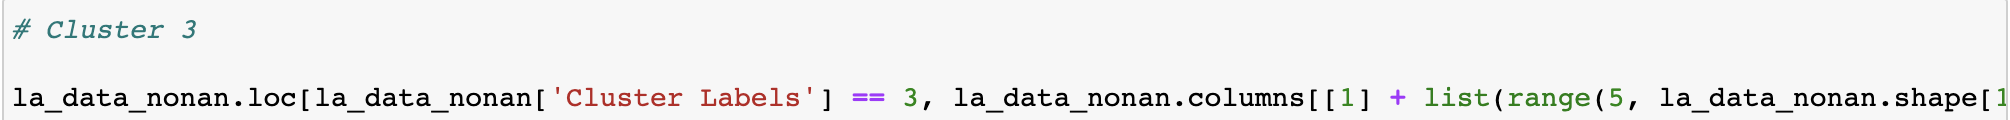

In [54]:
Image.open("23.png")

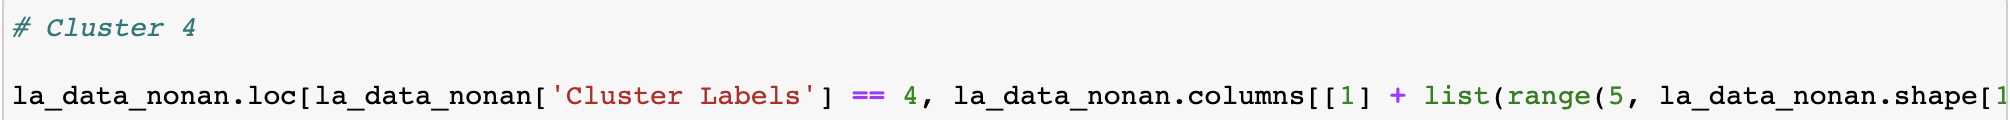

In [55]:
Image.open("24.png")

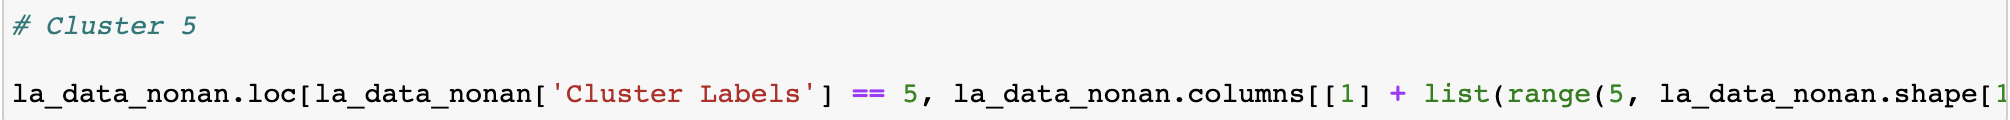

In [56]:
Image.open("25.png")

# Results#

### Map of Los Angeles, CA ###

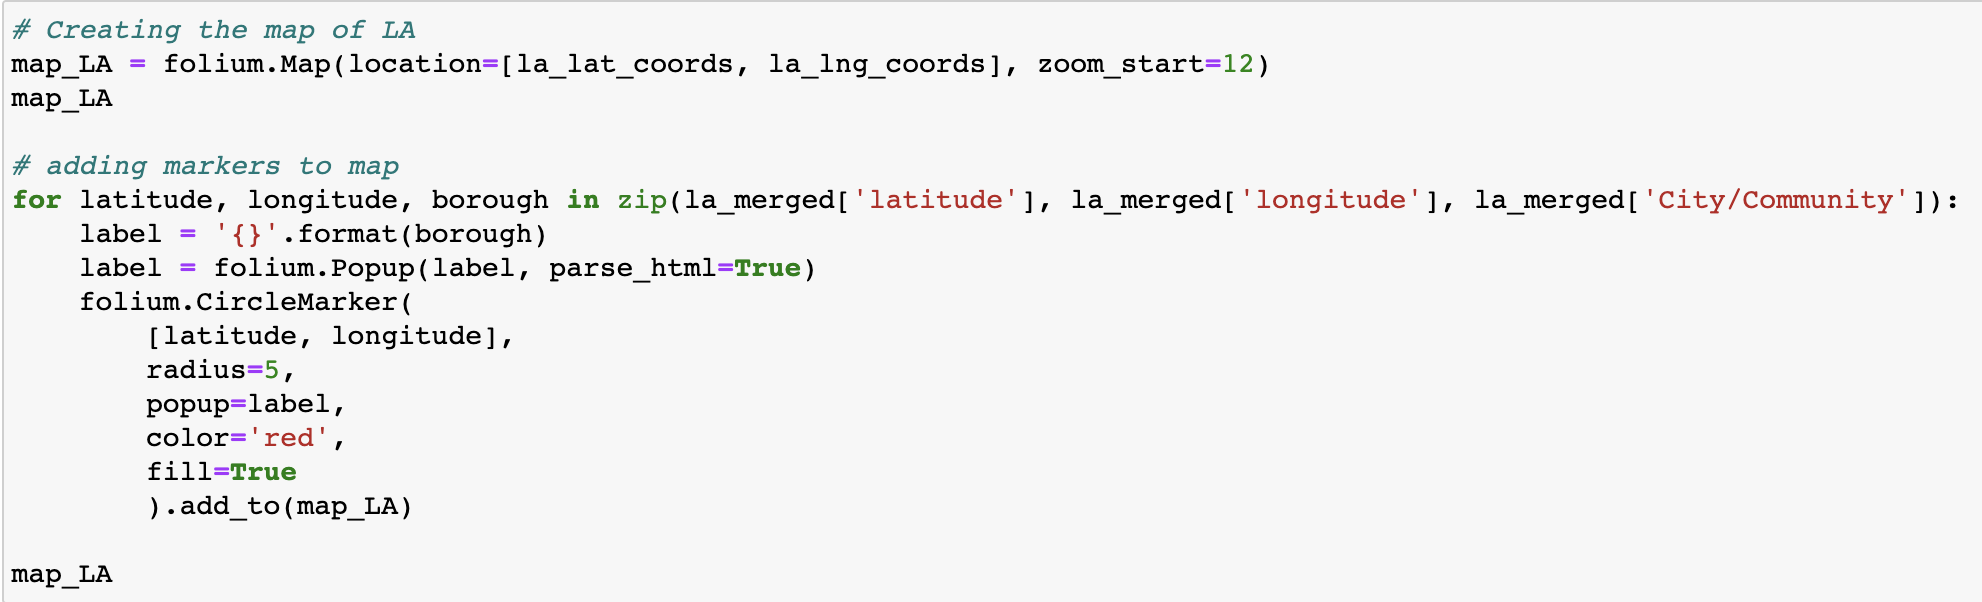

In [58]:
Image.open("20.png")

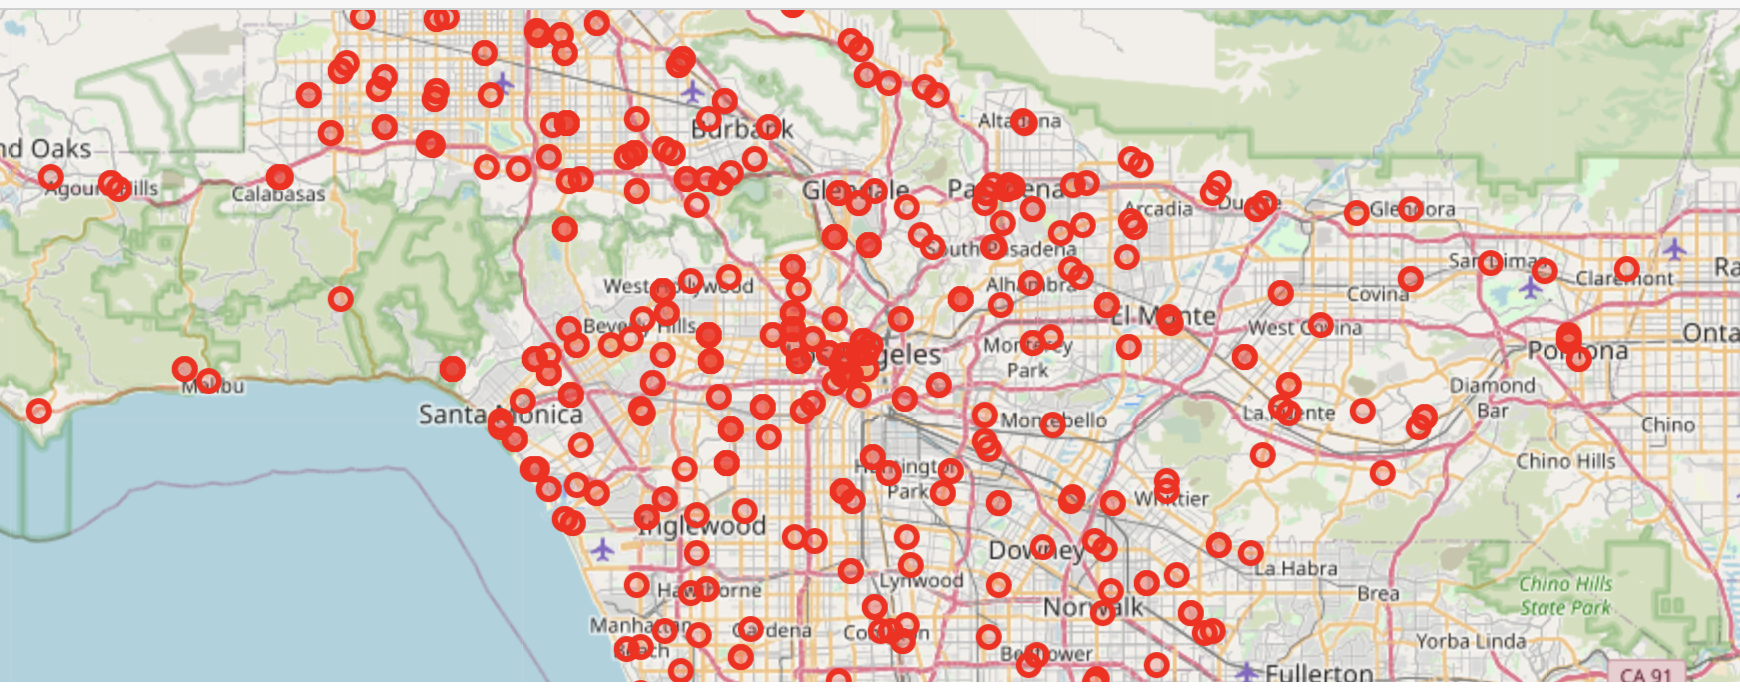

In [59]:
Image.open("8.png")

The County of Los Angeles is most crowded around downtown LA and less crowded as we move away from the center towards West Covina, Norwalk, Monterey Park, etc., or even further to Thousand Oaks, likely sacraficing conveniency.

### Cluster Map ###

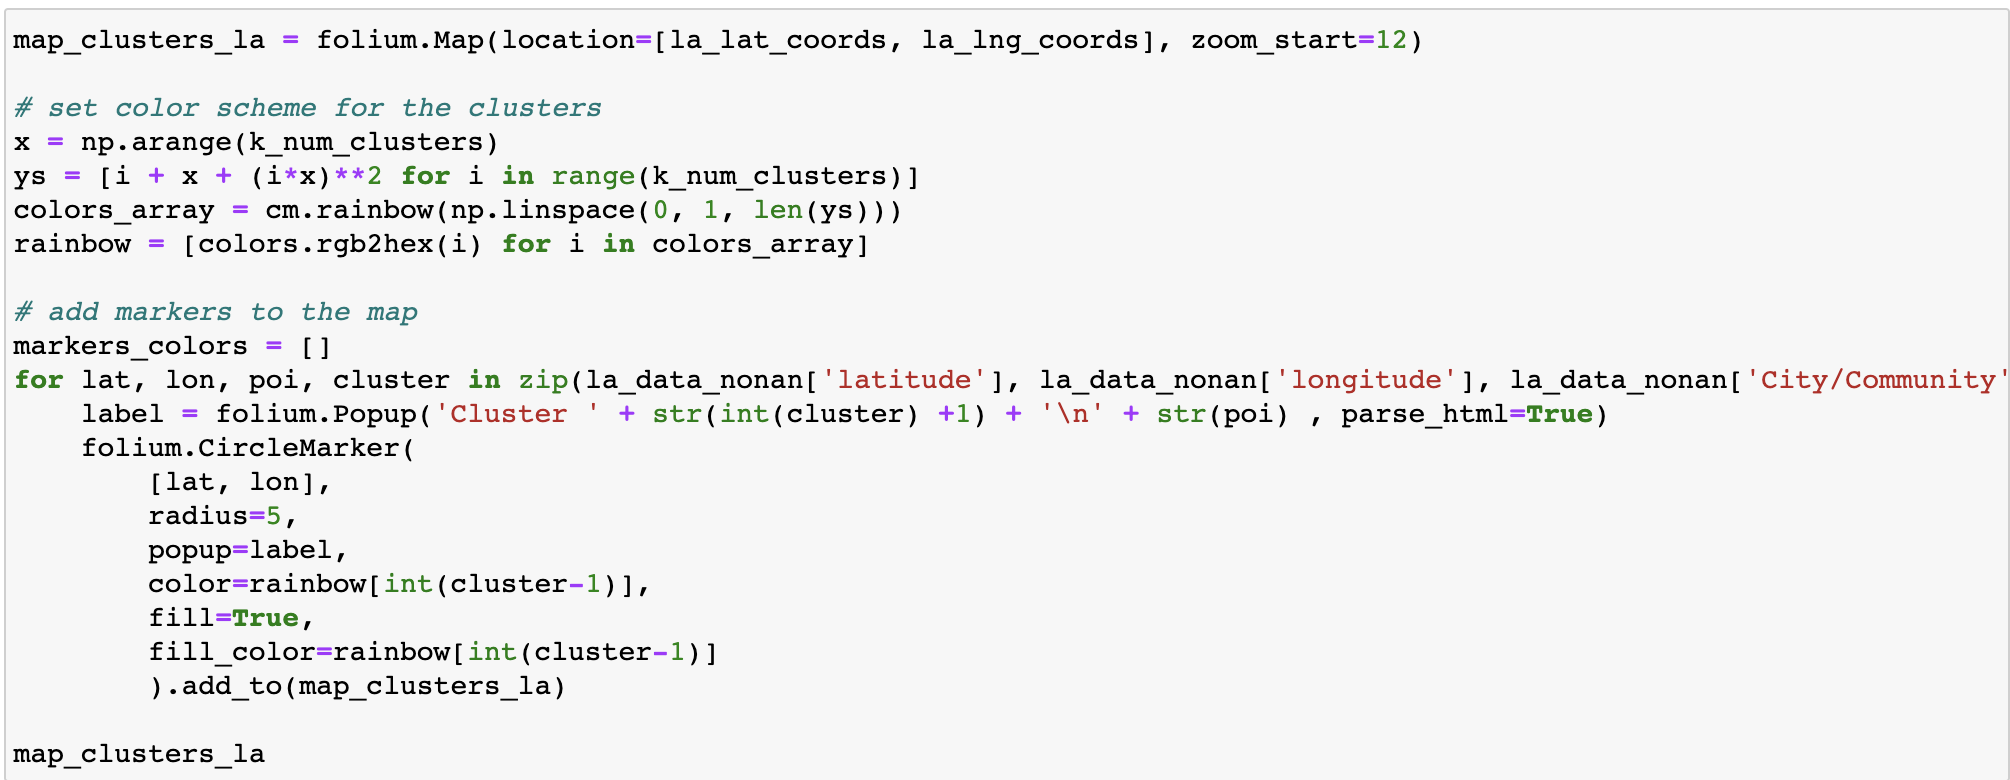

In [60]:
Image.open("19.png")

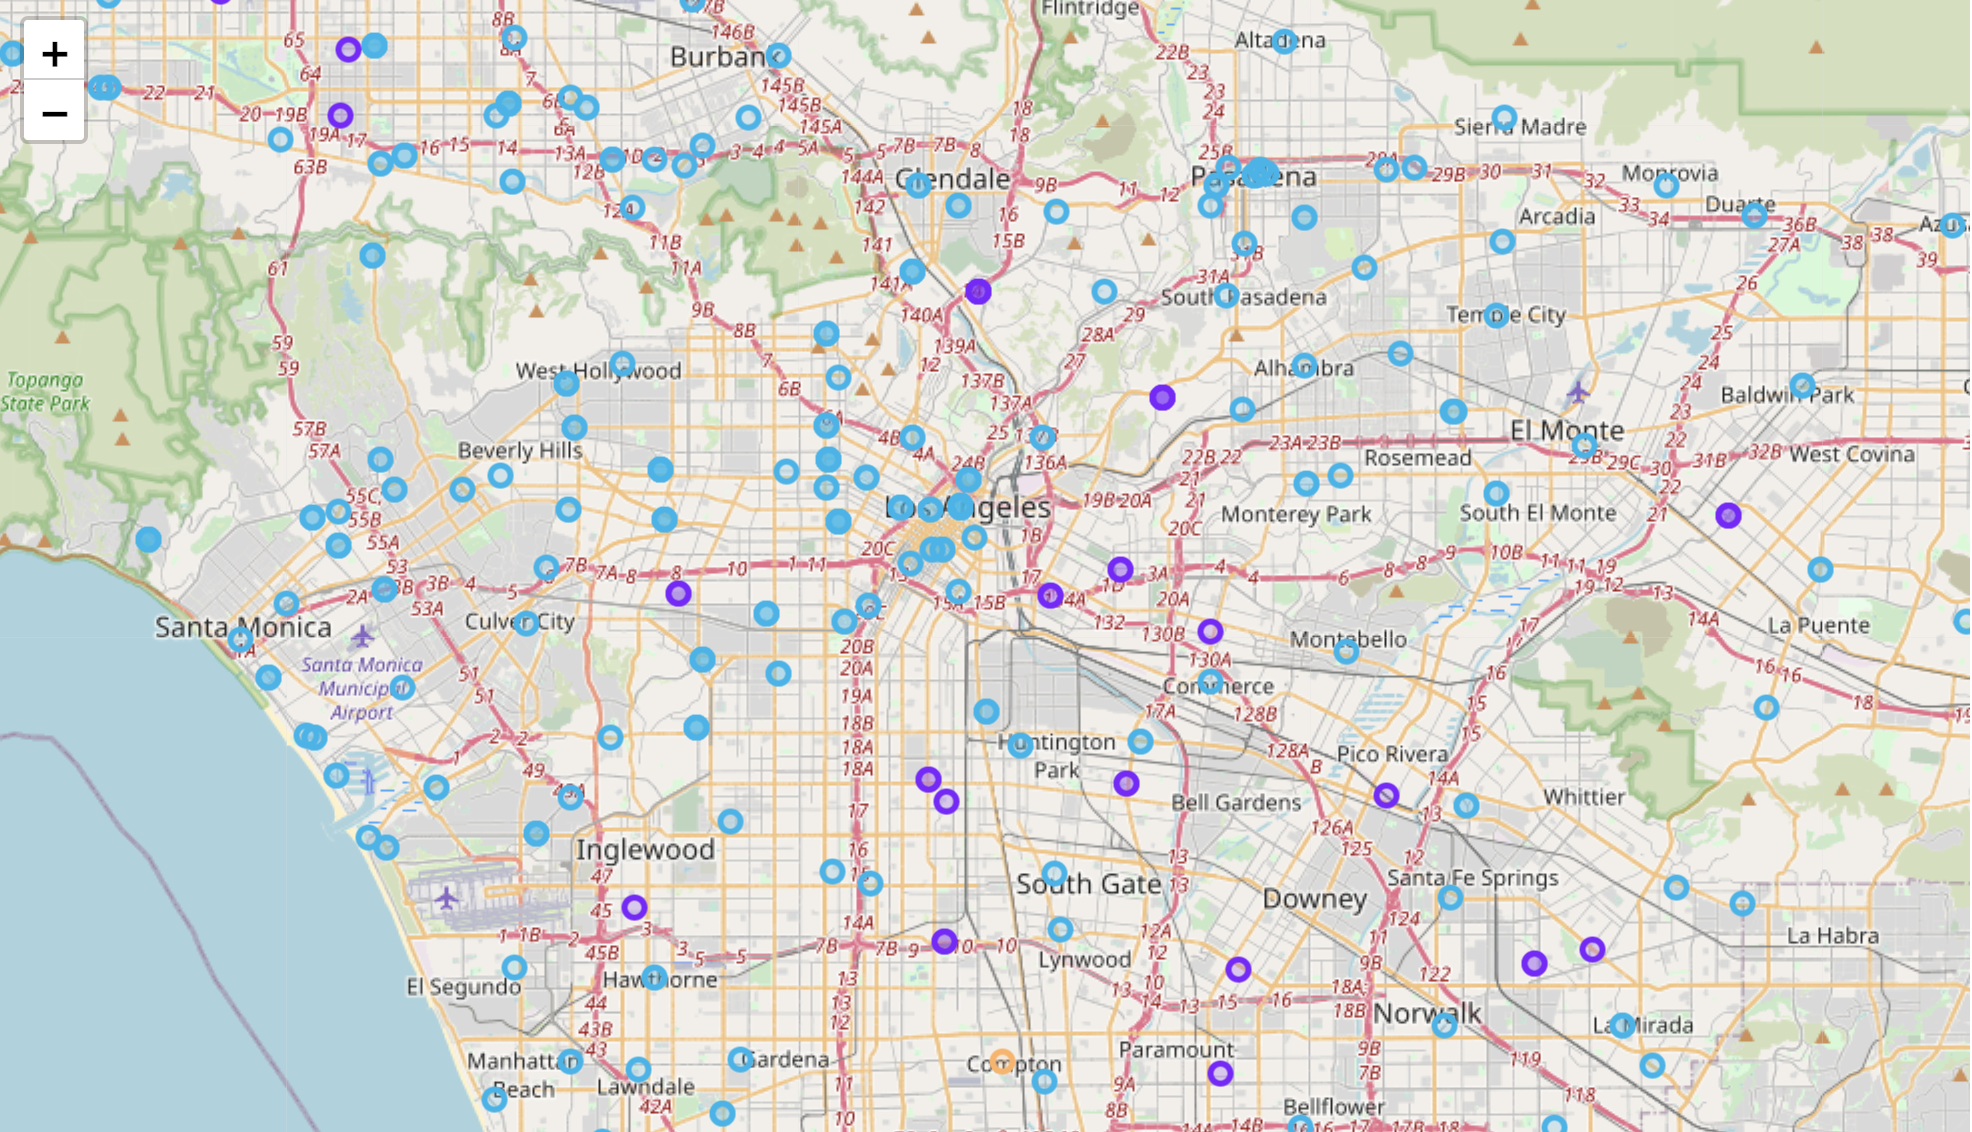

In [61]:
Image.open("18.png")

Los Angeles is a popular destination for new immigrants to the United States. It is one of the most diverse and multicultural areas in California. There are a lot of different restaurants serving Chinese, Korean, Japanese, Italian, Thai food, etc. LA seems to take a step further in this direction by having a lot of bars, coffee shops,  Breakfast spots, and sweets shop. There are also lots of big shopping malls, Flea markets, flower shops, seafood markets, etc. The main modes of transport seem to be cars. Almost every family owns a car. Overall, the city of LA offers a multicultural, diverse and an entertaining experience.

# Discussion #

Problem To find answer to the following questions:

Which area is most crowded with the most venues nearby?
- The County of Los Angeles is most crowded around downtown LA and less crowded as we move away from the center towards West Covina, Norwalk, Monterey Park, etc., or even further to Thousand Oaks, likely sacraficing conveniency.

What crime happens most frequently in that area?
- Battery - Simple Assult.

This project aims to help people like myself who wish to reside in Los Angeles，California in the future but do not know which neighborhood to choose. Los Angeles is a very versatile region, with the downtown being populated and commercialized and the surrounding regions being chill and sparsely populated. For example, I personally enjoy living in a tranquil environment, so I would choose to live around the edges of LA. It helps people make decisions based on their personal interest. This includes the choice of conveniency (the distance to shops and restaurants nearby), the number of schools around and their ratings, the crime rate, the budget on housing and living expenses, etc. There are a lot to explore before one makes such an important decision.

This project serves as a guidence for people to find the neighborhoods of their best fit. This project is be done with the use of k-clustering.

# Conclusion #

In this project, We first observed the type of crimes happening around the neighbourhoods in LA and got a sense of crime rate and the most common type of crime that happens there. Then we extratced the zip codes of different city/community in LA and pass it through ArcGIS API to get the logitude and latitude corresponding to each zip code. From this, we are able to generate a map visualization of LA and see which areas are most crowded with various types of venues. At last, using k-means cluster algorithm, we built a model to separate the neighborhood into five different clusters for 522 different city/community in the county of LA. We also generated a cluster map from the five clusters. The clusters made the analysis process easier.

This project allowed me to come up with a practical problem to resolve a real-life situation, and to utilize many helpful data science tools and functions in the process.